In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [288]:
class Survey(object):
    def __init__(self, df,name):
        self.df = df
        self.name = name
        self.themes = {
            'RdBu': ['#ca0020', '#f4a582', '#f7f7f7', '#0571b0', '#92c5de', '#f7f7f7'],
            'BrBG': ['#a6611a', '#dfc27d', '#f5f5f5', '#018571', '#80cdc1', '#f5f5f5'],
            'PiYG': ['#d01c8b', '#f1b6da', '#f7f7f7', '#4dac26', '#b8e186', '#f7f7f7'],
            'Spectral': ['#d7191c', '#fdae61', '#ffffbf', '#2b83ba', '#abdda4', '#ffffbf']
            }
        self.colors = self.themes['RdBu']
        
    def set_theme(self, colors = None):
        """
        Changes the theme of the plots. If no color is selected it prints the theme choices to the screen
        """
        if colors == None:
            print (f'Choose from one of the following: ')
            for i in self.themes.keys():
                print('\t' + i)
        else:
            self.colors = self.themes[colors]
        
    def list_questions(self):
        """
        Print out the survey questions for review
        """
        self.questions = list(self.df.columns)
        for i, question in enumerate(self.questions):
            print(f'{i+1} {question}\n')
            
    def plot_response(self, question):
        """
        produces a count plot chart of the responses to the 
        specified question
        """
        self.question = self.questions[question - 1]
        ax = sns.countplot(
                data = self.df, 
                y = self.question, 
                color = self.colors[3],
                order = self.df[self.question].value_counts().index
                            )
        ax.set_title(self.name)
        ax.set_ylabel(self.question)
        ax.set_xlabel('# of Responses')
        plt.show()

    def diverging_bar(self, question, positive_responses, negative_responses, neutral_responses):
        """
        creates a diverging bar chart with percentage of responses diverging away from the neutral response
        
        positive = [Always, Often]
        negative = [Never, Rarely]
        neutral = [Sometimes]
        """
        self.pos = positive_responses
        self.neg = negative_responses
        self.neut = neutral_responses
        self.question = question
        
        self.df['Count'] = 1
        self.__df = self.df[[self.question, 'Count']].groupby(self.question).count().reset_index()
        self.__df['pct'] = self.__df['Count']/len(self.df)*100
        self.__df = self.__df.set_index(self.question)
        
        seg_markers = [-1*(self.__df['pct'][self.neg[0]] + self.__df['pct'][self.neg[1]] + self.__df['pct'][self.neut[0]]/2),
            -1*(self.__df['pct'][self.neg[1]] + self.__df['pct'][self.neut[0]]/2),
            -1*(self.__df['pct'][self.neut[0]]/2),
            self.__df['pct'][self.pos[1]] + self.__df['pct'][self.pos[0]] + self.__df['pct'][self.neut[0]]/2,
            + self.__df['pct'][self.pos[0]] + self.__df['pct'][self.neut[0]]/2,
            self.__df['pct'][self.neut[0]]/2]

        
        fig, ax = plt.subplots()
        fig.set_size_inches(9,3)
        ax.barh([1,1,1,1,1,1], seg_markers, 
                color = self.colors)
        ax.set_xlabel('Percent of Responses')
        ax.set_ylabel('')
        ax.yaxis.set_ticks([])

    
    def plot_matrix_divering_bar(self):
        """
        creates a diverging bar chart with percentage of responses to multiple questions and orders questions 
        most positive to most negative
        
        positive = [Always, Often]
        negative = [Never, Rarely]
        neutral = [Sometimes]
        """
        pass
    
    def analayze_results(self):
        """
        give summary of results
        """
        pass
    
    def plot_all_responses(self):
        """
        plot all the responses
        """
        for i, question in enumerate(self.questions):
            print('\n')
            self.plot_response(i)
    

In [289]:
mySurvey = Survey(pd.read_excel('~/Downloads/Red Rocks 2021.xlsx'), 'Red Rocks')

In [290]:
mySurvey.set_theme()

Choose from one of the following: 
	RdBu
	BrBG
	PiYG
	Spectral


In [291]:
mySurvey.list_questions()

1 Route

2 Grade

3 Wall

4 Area



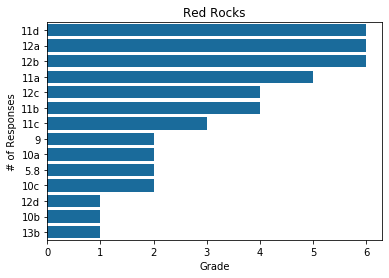

In [292]:
mySurvey.plot_response(2)

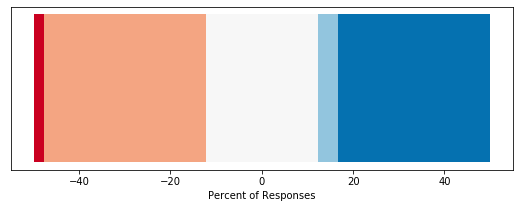

In [284]:
positive = ['Black Velvet Canyon', 'Second Pullout']
negative = ['Willow Springs', 'Calico Basin']
neutral = ['Sandstone Quarry']

mySurvey.diverging_bar('Area', negative, positive, neutral)

In [285]:
mySurvey.set_theme('PiYG')

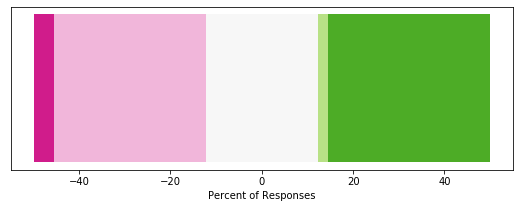

In [286]:
mySurvey.diverging_bar('Area', positive, negative, neutral)

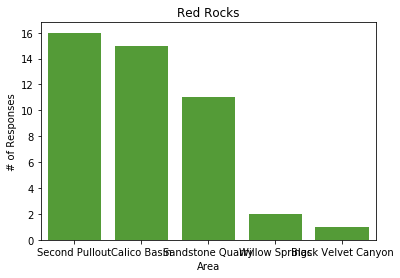

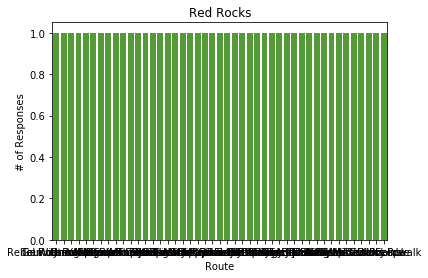

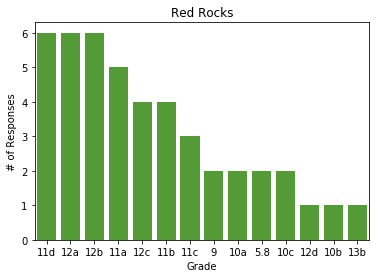

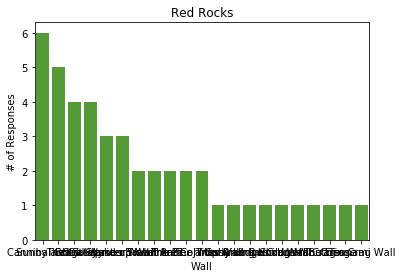

In [287]:
mySurvey.plot_all_responses()

In [78]:
df = pd.read_excel('~/Downloads/Red Rocks 2021.xlsx')